# Gradient Boosting

Another notebook touching on boosting, specifically gradient boosting.

## What we will accomplish

In this notebook we will:
- Learn the concept behind gradient boosting:
    - See why it is called gradient boosting and
    - Demonstrate the method with nice plots and
- Implement the algorithm in `sklearn`:
    - Define early stopping.

In [1]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
from seaborn import set_style

## This sets the plot style
set_style("whitegrid")

Gradient boosting is another boosting technique in which we iteratively build an ensemble of weak learners to hopefully create a strong learner. The approach for this boosting algorithm is to directly train weak learner $j+1$ to model weak learner $j$'s errors. 

Let's be more explicit now with an example in regression. Recall that in regression we try to model a quantitative variable, $y$, using $m$ features contained in a matrix, $X$. Gradient boosting for this problem then wooks like so:

<i>Step 1</i>
- Train a weak learner regression algorithm (say a decision stump regressor) to predict $y$, this is weak learner $1$.
- Calculate the residuals, $r_1 = y - h_1(X)$, where $h_1(X) = \hat{y}$ is the prediction of weak learner $1$.

<i>Step $j$</i>
- Train a weak learner to predict the residuals at step $j-1$, $r_{j-1}$,
    - Set $h_j(X) = \hat{r}_{j-1}$ denote the $j^\text{th}$ weak learner's estimate of the residuals.
- Calculate the residuals for this weak learner, $r_{j} = r_{j-1} - h_j(X)$.
- Stop when $j+1 = J$, a predetermined stopping point.


The prediction for $y$ at step $j$ is then found by:
$$
h(X) = h_1(X) + h_2(X) + \dots + h_j(X)
$$

Let's visualize this.

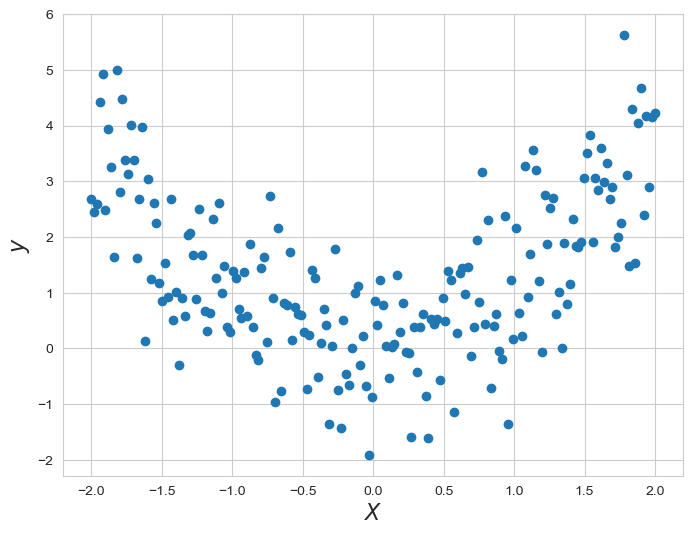

In [2]:
## Generate some data
np.random.seed(220)
X = np.linspace(-2,2,200)

y = X**2 + np.random.randn(200)

## Visualize the training data
plt.figure(figsize=(8,6))
plt.scatter(X,y)
plt.xlabel("$X$", fontsize=16)
plt.ylabel("$y$", fontsize=16)
plt.show()

In [3]:
from sklearn.tree import DecisionTreeRegressor

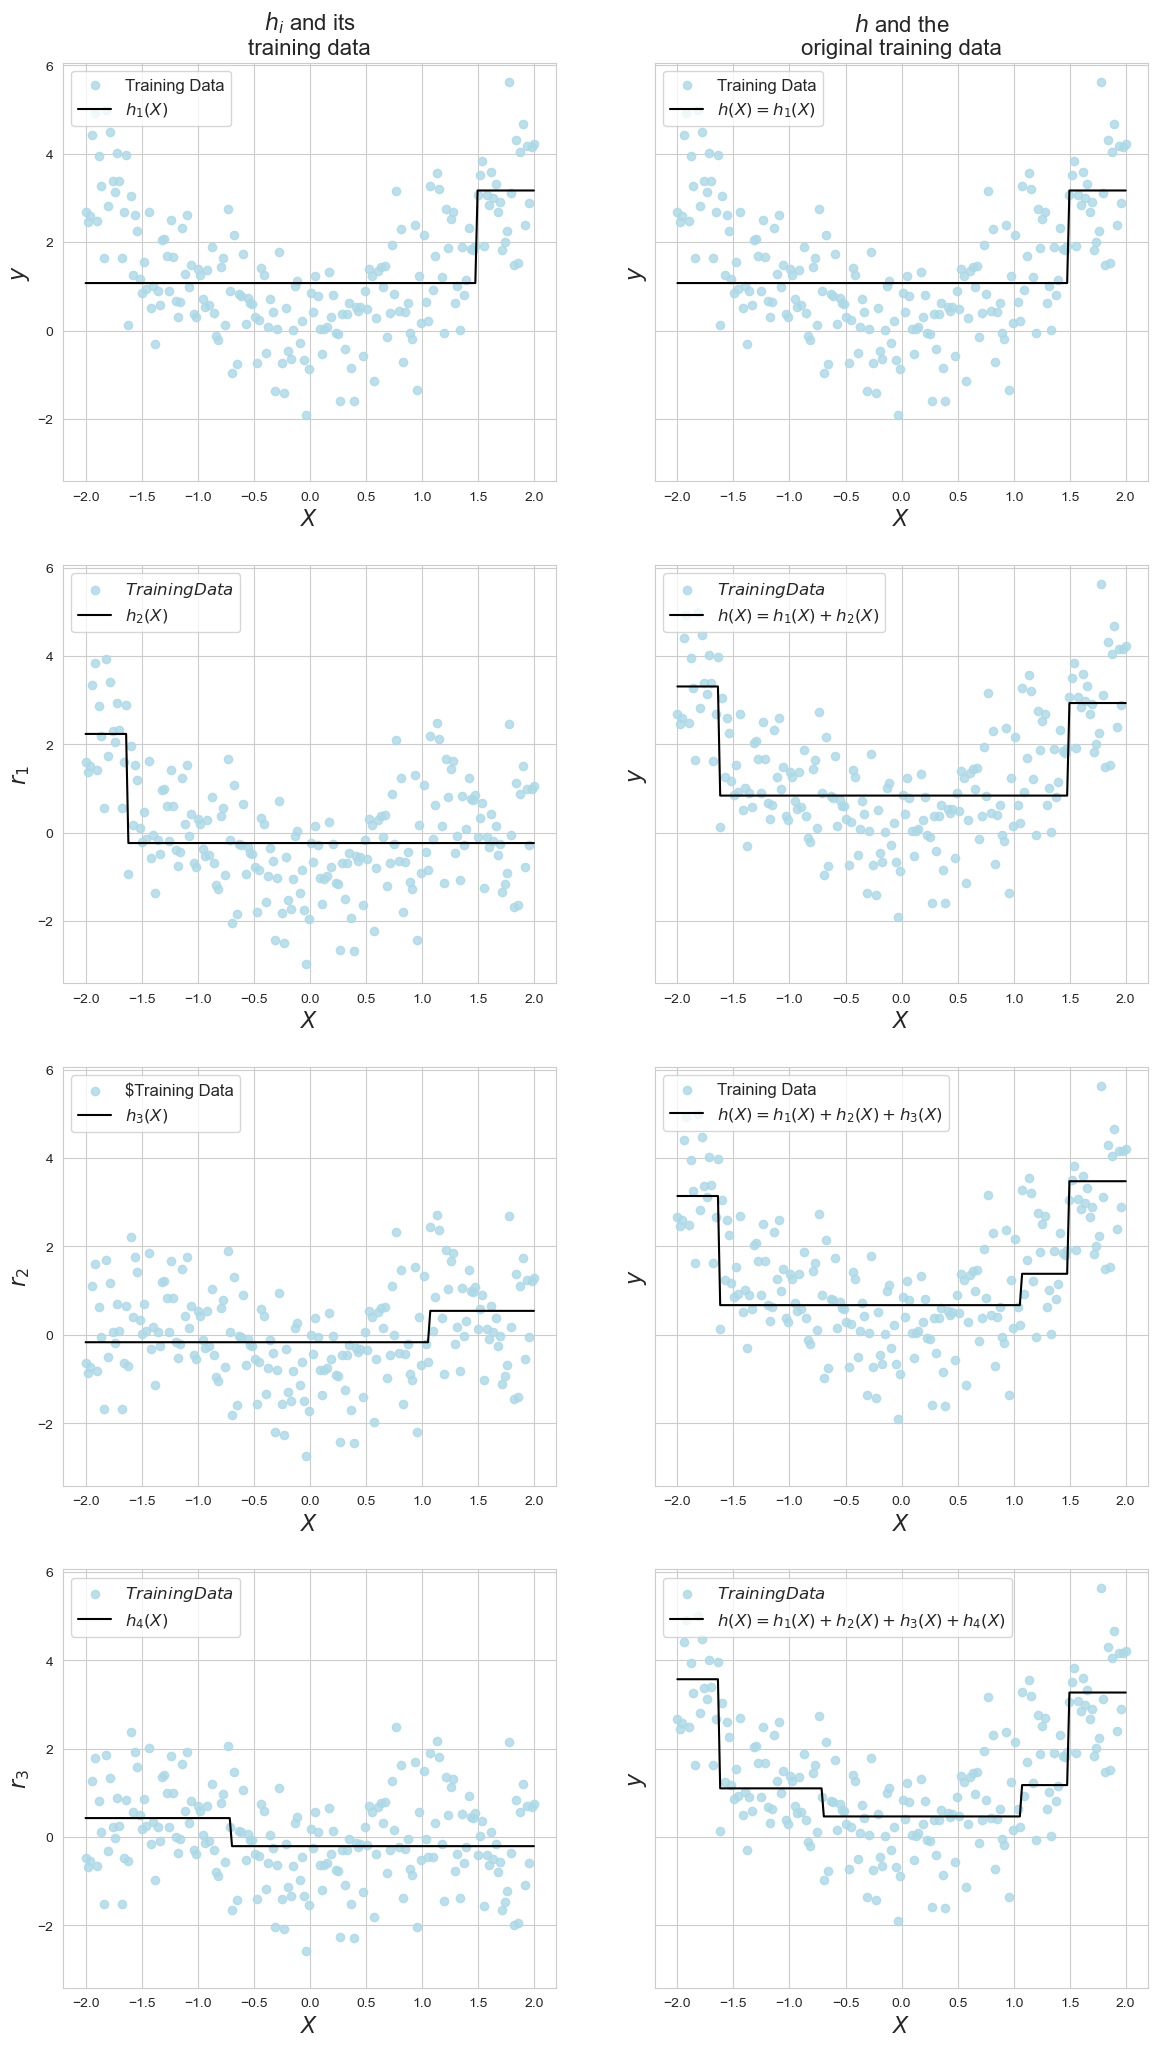

In [4]:
fig,ax = plt.subplots(4,2, figsize=(14,25), sharey=True)

### WEAK LEARNER 1 ###
## Train tree 1
tree1 = DecisionTreeRegressor(max_depth=1)
tree1.fit(X.reshape(-1,1),y)
h1 = tree1.predict(X.reshape(-1,1))
r1 = y-h1

## plot h1
ax[0,0].scatter(X, y ,c='lightblue', alpha=.8, label='Training Data')
ax[0,0].plot(X, h1, 'k', label="$h_1(X)$")
ax[0,0].legend(fontsize=12, loc=2)
ax[0,0].set_xlabel("$X$", fontsize=16)
ax[0,0].set_ylabel("$y$", fontsize=16)

## plot h
ax[0,1].scatter(X, y, c='lightblue', alpha=.8, label='Training Data')
ax[0,1].plot(X, h1, 'k', label="$h(X)=h_1(X)$")
ax[0,1].legend(fontsize=12, loc=2)
ax[0,1].set_xlabel("$X$", fontsize=16)
ax[0,1].set_ylabel("$y$", fontsize=16)

### WEAK LEARNER 2 ###
## Train tree 2
tree2 = DecisionTreeRegressor(max_depth=1)
tree2.fit(X.reshape(-1,1),r1)
h2 = tree2.predict(X.reshape(-1,1))
r2 = r1-h2

## plot h2
ax[1,0].scatter(X, r1, c='lightblue', alpha=.8, label='$Training Data$')
ax[1,0].plot(X, h2, 'k', label="$h_2(X)$")
ax[1,0].legend(fontsize=12, loc=2)
ax[1,0].set_xlabel("$X$", fontsize=16)
ax[1,0].set_ylabel("$r_1$", fontsize=16)

## plot h
ax[1,1].scatter(X, y, c='lightblue', alpha=.8, label='$Training Data$')
ax[1,1].plot(X, h1+h2, 'k', label="$h(X)=h_1(X)+h_2(X)$")
ax[1,1].legend(fontsize=12, loc=2)
ax[1,1].set_xlabel("$X$", fontsize=16)
ax[1,1].set_ylabel("$y$", fontsize=16)


### WEAK LEARNER 3 ###
## Train tree 3
tree3 = DecisionTreeRegressor(max_depth=1)
tree3.fit(X.reshape(-1,1),r2)
h3 = tree3.predict(X.reshape(-1,1))
r3 = r2-h3

## plot h3
ax[2,0].scatter(X, r2, c='lightblue', alpha=.8, label='$Training Data')
ax[2,0].plot(X, h3, 'k', label="$h_3(X)$")
ax[2,0].legend(fontsize=12, loc=2)
ax[2,0].set_xlabel("$X$", fontsize=16)
ax[2,0].set_ylabel("$r_2$", fontsize=16)

## plot h
ax[2,1].scatter(X, y, c='lightblue', alpha=.8, label='Training Data')
ax[2,1].plot(X, h1+h2+h3, 'k', label="$h(X)=h_1(X)+h_2(X)+h_3(X)$")
ax[2,1].legend(fontsize=12, loc=2)
ax[2,1].set_xlabel("$X$", fontsize=16)
ax[2,1].set_ylabel("$y$", fontsize=16)


### WEAK LEARNER 4 ###
## Train tree 4
tree4 = DecisionTreeRegressor(max_depth=1)
tree4.fit(X.reshape(-1,1),r3)
h4 = tree4.predict(X.reshape(-1,1))
r4 = r3-h4

## plot h3
ax[3,0].scatter(X, r3, c='lightblue', alpha=.8, label='$Training Data$')
ax[3,0].plot(X, h4, 'k', label="$h_4(X)$")
ax[3,0].legend(fontsize=12, loc=2)
ax[3,0].set_xlabel("$X$", fontsize=16)
ax[3,0].set_ylabel("$r_3$", fontsize=16)

## plot h
ax[3,1].scatter(X, y, c='lightblue', alpha=.8, label='$Training Data$')
ax[3,1].plot(X, h1+h2+h3+h4, 'k', label="$h(X)=h_1(X)+h_2(X)+h_3(X)+h_4(X)$")
ax[3,1].legend(fontsize=12, loc=2)
ax[3,1].set_xlabel("$X$", fontsize=16)
ax[3,1].set_ylabel("$y$", fontsize=16)

ax[0,0].set_title("$h_i$ and its\ntraining data", fontsize=16)
ax[0,1].set_title("$h$ and the\noriginal training data", fontsize=16)







plt.show()

## Gradient boosting in `sklearn`

Now that we have an idea of how gradient boosting works, let's see how to implement it in `sklearn`.

For regression we use `sklearn`'s `GradientBoostingRegressor`, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html">https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html</a>. `GradientBoostingRegressor` does precisely what we did above, it trains a series of decision tree regressors (of default `max_depth=3`), where the number of trees trained is determined by `n_estimators` (default value of `100`).

In [5]:
## import GradientBoosting here
from sklearn.ensemble import GradientBoostingRegressor



Two ways control overfitting with a gradient boosting model is to change the number of trees we train and to change the `learning_rate`. We first demonstrate how the `learning_rate` impacts the model, then touch on the `n_estimators`.

#### `learning_rate`

The learning rate of the gradient boosting algorithm determines how much weight each weak learner recieves in the final prediction. `sklearn`'s default value is `0.1`. Let's demonstrate the difference between two `learning_rate`s now.

In [14]:
## make the first booster, rate of .1
## n_estimators = 10
## with a max_depth of 1
small_rate = GradientBoostingRegressor(max_depth=3,
                                          n_estimators=10,
                                          learning_rate=.1)

## make the second, rate of 1
large_rate = GradientBoostingRegressor(max_depth=3,
                                          n_estimators=10,
                                          learning_rate=1)


## fit both
small_rate.fit(X.reshape(-1,1), y)
large_rate.fit(X.reshape(-1,1), y)

GradientBoostingRegressor(learning_rate=1, n_estimators=10)

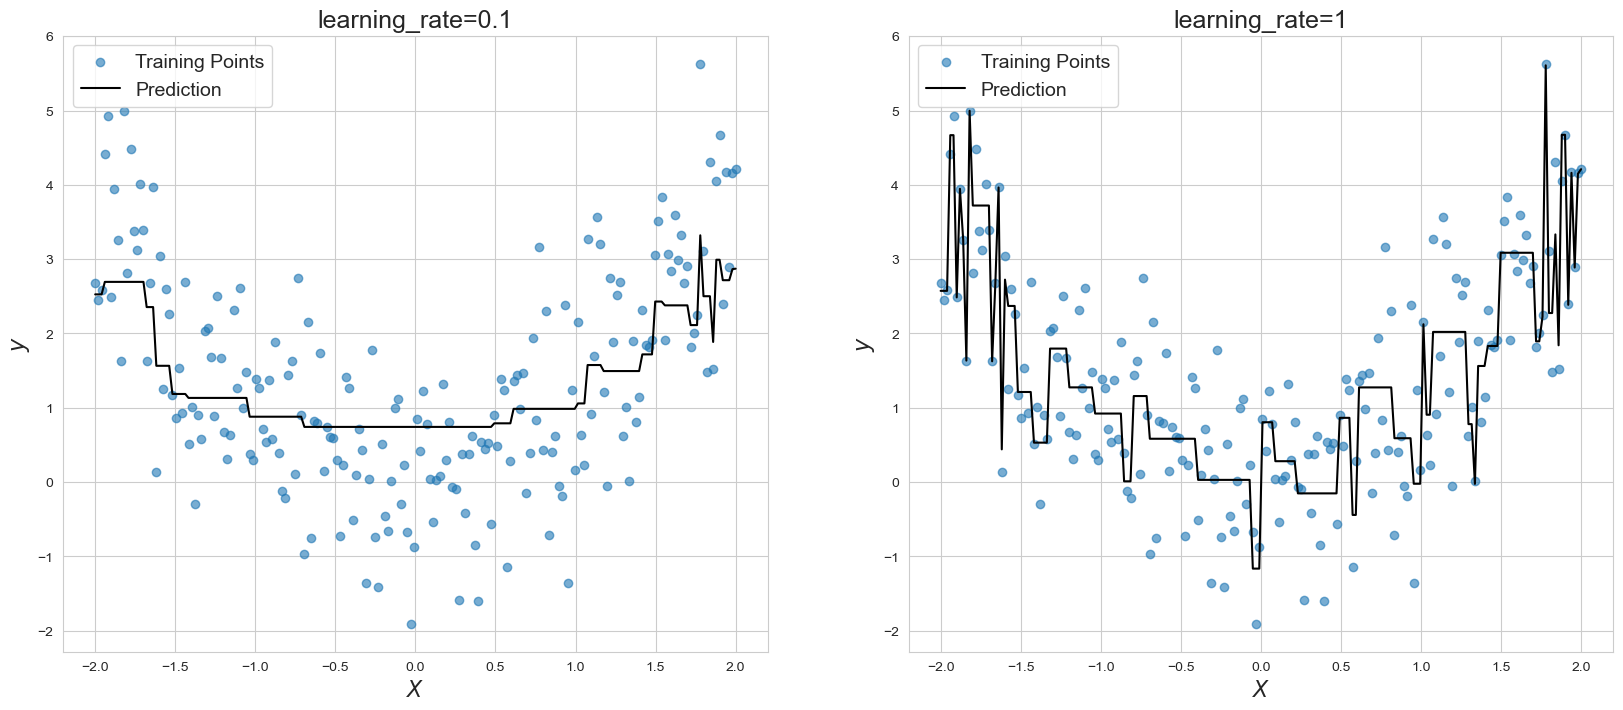

In [15]:
fig,ax = plt.subplots(1,2,figsize=(20,8))

ax[0].scatter(X, y, alpha=.6, label='Training Points')
ax[0].plot(X, small_rate.predict(X.reshape(-1,1)), 'k',label="Prediction")
ax[0].set_title("learning_rate=0.1", fontsize=18)
ax[0].legend(fontsize=14)
ax[0].set_xlabel("$X$", fontsize=16)
ax[0].set_ylabel("$y$", fontsize=16)

ax[1].scatter(X, y, alpha=.6, label='Training Points')
ax[1].plot(X, large_rate.predict(X.reshape(-1,1)), 'k',label="Prediction")
ax[1].set_title("learning_rate=1", fontsize=18)
ax[1].legend(fontsize=14)
ax[1].set_xlabel("$X$", fontsize=16)
ax[1].set_ylabel("$y$", fontsize=16)

plt.show()

It is typically preferred to use a small learning rate and train more trees than to use a large learning rate.

#### `n_estimators` and early stopping

A second way to control over/underfitting a gradient booster is by controlling the number of weak learners you train. 

One way to find this that may be preferable to cross-validation is to use a validation set. You track the error on the validation set as you train each additional weak learner. Then you pick the number of weak learners that had the lowest validation set error.

Let's demonstrate the method `staged_predict` which retuns an iterator over the predictions made by the booster at each level (with one tree, with two trees and so on).

In [16]:
## Here I will generate a validation set because the data are randomly generated
## in practice you would need to split the data
X_val = np.linspace(-2,2,200)
y_val = X_val**2 + np.random.randn(200)

In [17]:
## import mse
from sklearn.metrics import mean_squared_error

In [18]:
## Make a new booster
n_trees = 200
gb = GradientBoostingRegressor(max_depth=1,
                               n_estimators=n_trees)

## fit the booster
gb.fit(X.reshape(-1,1), y)

GradientBoostingRegressor(max_depth=1, n_estimators=200)

In [22]:
## use a list comprehension and staged_predict to get validation errors
mses = [mean_squared_error(y_val, pred) for pred in gb.staged_predict(X_val.reshape(-1,1))]

In [21]:
gb.staged_predict(X_val.reshape(-1,1))

<generator object GradientBoostingRegressor.staged_predict at 0x282d04b30>

In [23]:
mses

[2.4517020978317814,
 2.3726867764520896,
 2.288802307267608,
 2.2228543789341457,
 2.1511662626808725,
 2.0927864801286997,
 2.035847728383075,
 1.9865049660271614,
 1.9332506142661838,
 1.8864616918983483,
 1.8457070071773398,
 1.8080368125739112,
 1.7689252953529877,
 1.733724245912355,
 1.700788641804764,
 1.671868377671838,
 1.6383590771885639,
 1.6136875710773564,
 1.5914856454484496,
 1.567645478553121,
 1.5394167125244667,
 1.5201483628714159,
 1.495242742636882,
 1.4766089643545832,
 1.4599120235940006,
 1.4448587430679027,
 1.4240749506946873,
 1.4018043596415881,
 1.3890040504580474,
 1.3762450858803377,
 1.3589966400344833,
 1.3478367623858298,
 1.3329678685893611,
 1.315541380031346,
 1.3062992360061998,
 1.2969718440441442,
 1.2851523899859467,
 1.2783555358973147,
 1.2675556965660302,
 1.2535209335021864,
 1.242886462065365,
 1.236843181677566,
 1.2276286365489668,
 1.220990459638025,
 1.2150224744013831,
 1.2027384785682027,
 1.1948545006049922,
 1.1898099259828792,
 1.

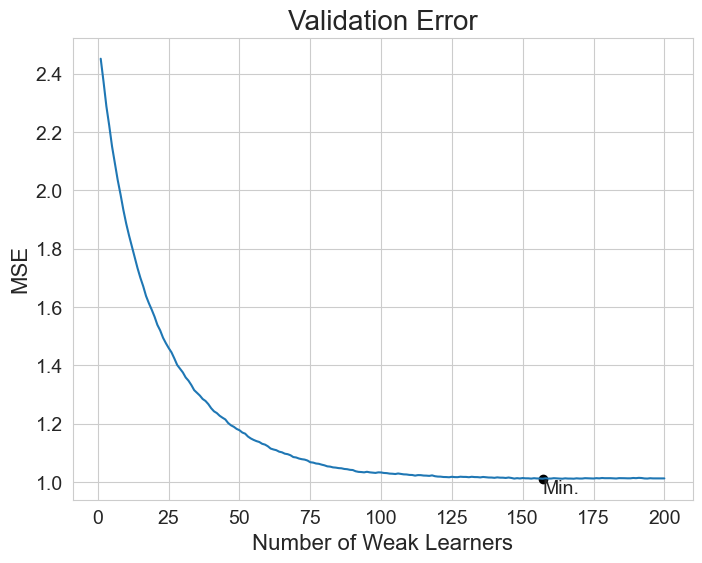

In [24]:
plt.figure(figsize=(8,6))

plt.plot(range(1,n_trees+1), mses)
plt.scatter([range(1,n_trees+1)[np.argmin(mses)]], [np.min(mses)], c='k')
plt.text(range(1,n_trees+1)[np.argmin(mses)], np.min(mses)-.05, "Min.", fontsize=14)

plt.title("Validation Error", fontsize=20)
plt.xlabel("Number of Weak Learners", fontsize=16)
plt.ylabel("MSE", fontsize=16)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.show()

In [25]:
range(1,n_trees+1)[np.argmin(mses)]

157

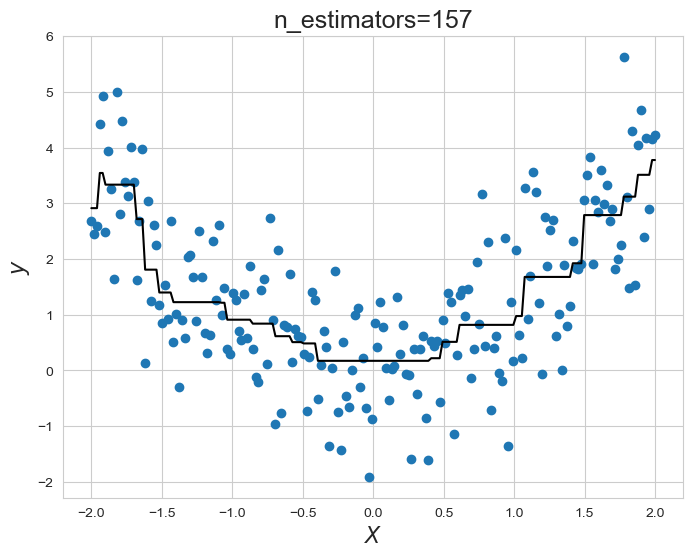

In [27]:
best_num = range(1,n_trees+1)[np.argmin(mses)]
gb = GradientBoostingRegressor(max_depth=1, n_estimators=best_num)
gb.fit(X.reshape(-1,1),y)

plt.figure(figsize=(8,6))

plt.scatter(X,y,label='Training Points')
plt.plot(X, gb.predict(X.reshape(-1,1)), 'k',label="Prediction")
plt.title("n_estimators="+str(best_num), fontsize=18)
plt.xlabel("$X$", fontsize=16)
plt.ylabel("$y$", fontsize=16)

plt.show()

#### Early stopping

We can also implement what is known as <i>early stopping</i>, where we stop training additional layers when it appears that we have reached a minimum. This saves time compared to training many trees and then looking retrospectively to find the best one.

To do so in `sklearn` we use the `warm_start` argument, which forces `sklearn` to keep older layers when the fit method is called. Let's see what we mean now.

In [28]:
## make the model object
gb = GradientBoostingRegressor(max_depth=1, warm_start=True)

## an initial value
min_validation_error = float("inf")

val_errors = []

## to keep track of if our error went up
times_error_went_up_in_a_row = 0

for n_estimators in range(1,500):
    print("Training weak learner",n_estimators)
    # set the number of estimators
    gb.n_estimators = n_estimators
    
    # fit/refit the model
    gb.fit(X.reshape(-1,1), y)
    
    # record the validation error
    val_errors.append(mean_squared_error(y_val, gb.predict(X_val.reshape(-1,1))))
    
    ## check if the error went up or down
    # if it went down
    if val_errors[-1] < min_validation_error:
        # record the new minimum val error
        min_validation_error = val_errors[-1]
        
        # reset our up counter
        times_error_went_up_in_a_row = 0
    # if it went up
    else:
        # add to the counter
        times_error_went_up_in_a_row = times_error_went_up_in_a_row + 1
        # if this is the 5th time in a row it has gone up
        if times_error_went_up_in_a_row == 10:
            # stop early
            break

Training weak learner 1
Training weak learner 2
Training weak learner 3
Training weak learner 4
Training weak learner 5
Training weak learner 6
Training weak learner 7
Training weak learner 8
Training weak learner 9
Training weak learner 10
Training weak learner 11
Training weak learner 12
Training weak learner 13
Training weak learner 14
Training weak learner 15
Training weak learner 16
Training weak learner 17
Training weak learner 18
Training weak learner 19
Training weak learner 20
Training weak learner 21
Training weak learner 22
Training weak learner 23
Training weak learner 24
Training weak learner 25
Training weak learner 26
Training weak learner 27
Training weak learner 28
Training weak learner 29
Training weak learner 30
Training weak learner 31
Training weak learner 32
Training weak learner 33
Training weak learner 34
Training weak learner 35
Training weak learner 36
Training weak learner 37
Training weak learner 38
Training weak learner 39
Training weak learner 40
Training 

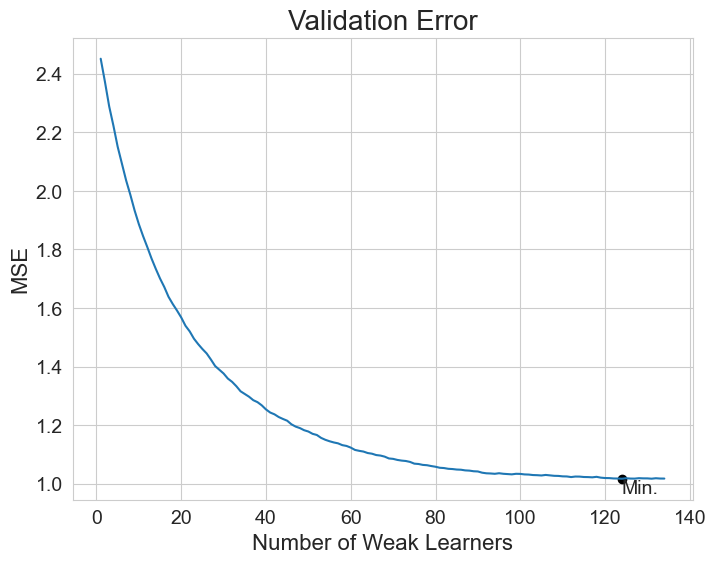

In [30]:
plt.figure(figsize=(8,6))

plt.plot(range(1,n_estimators+1), val_errors)
plt.scatter([range(1,n_estimators+1)[np.argmin(val_errors)]], [np.min(val_errors)], c='k')
plt.text(range(1,n_estimators+1)[np.argmin(val_errors)], np.min(val_errors)-.05, "Min.", fontsize=14)

plt.title("Validation Error", fontsize=20)
plt.xlabel("Number of Weak Learners", fontsize=16)
plt.ylabel("MSE", fontsize=16)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.show()

### Why "gradient" boosting?

Before ending this notebook, let's discuss why this is known as "gradient" boosting.

At step $j$ denote our prediction for $y$ as $\hat{y} = H_j(X) = \sum_{k=1}^j h_k(X)$. Then for step $j+1$ we have the following estimate of $y$:

$$
y \approx  H_{j+1}(X) = H_j(X) + h_{j+1}(X),
$$

which we can alternatively think of as:

$$
h_{j+1}(X) \approx y - H_j(X).
$$

Recall that for a regression problem we have typically attempted to minimize the MSE of the estimate, which, for simplicity, we can denote as:

$$
\frac{1}{n}\left(y - H_j(X)\right)^2, \text{ at  the } j+1 \text{ step.}
$$

Taking the negative gradient of this with respect to the estimate $H_j$ gives:

$$
\frac{2}{n} \left( y - H_j(X) \right) \approx \frac{2}{n}h_{j+1}(X).
$$

And so gradient boosting is roughly speaking a gradient descent algorithm.

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2022.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)